# Prediction of Demand for Shared Bikes

## (Linear Regression)

### Problem Statement

Build a model which predicts the demand for shared bikes.

## Step 1: Reading and Understanding the Data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Read the Data

bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Check the columns in the dataset

print(bike.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [4]:
# Checking the number of rows in the dataset

bike.shape

(730, 16)

In [5]:
# Checking for any null values in the dataset


count = bike.isnull().sum()
print(count)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [6]:
# Checking if there is any missing data

bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### As per the above informations there are no missing values or any null values in the dataset.

In [7]:
# Checking the numerical statistics of the dataset

bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2: Manipulating and Visualising the Data

In [8]:
# From the given data we can understand that the variable 'instant' is an index column so we can drop it

bike.drop(['instant'], axis = 1, inplace = True)
bike.head(10)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [9]:
# Now we know that 'casual' + 'registered' is equal to 'cnt'
# 'cnt' is our target variable
# Therefore we will drop 'casual' and 'registered' for more clear data

bike.drop(['casual', 'registered'], axis = 1, inplace = True)
bike.head(10)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,1606
6,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,1510
7,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,959
8,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,822
9,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,1321


In [10]:
# Check for the datatypes of the variables

bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  cnt         730 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 74.3+ KB


### By looking at the data we can understand that the variables `season`, `yr`, `mnth`, `weekday`, `holiday`, `workingday` & `weathersit`  all are categorical variables.

### We will replace `season`, `mnth`, `weekday` and `weathersit` with appropriate values.

In [11]:
# Changing 'season' into a categorical variable

bike['season'].replace({1 : 'spring', 2 : 'summer', 3 : 'fall', 4 : 'winter'}, inplace = True)
bike.head(10)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,06-01-2018,spring,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,1606
6,07-01-2018,spring,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,1510
7,08-01-2018,spring,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,959
8,09-01-2018,spring,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,822
9,10-01-2018,spring,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,1321


In [12]:
# Changing 'mnth' into a categorical variable

bike['mnth'].replace({1 : 'jan', 2 : 'feb', 3 : 'mar', 4 : 'apr', 5 : 'may', 6 : 'june', 7 : 'july', 8 : 'aug', 9 : 'sep', 10 : 'oct', 11 : 'nov', 12 : 'dec'}, inplace = True)
bike.head(10)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,spring,0,jan,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,spring,0,jan,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,spring,0,jan,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,spring,0,jan,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,spring,0,jan,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,06-01-2018,spring,0,jan,0,4,1,1,8.378268,11.66045,51.8261,6.000868,1606
6,07-01-2018,spring,0,jan,0,5,1,2,8.057402,10.44195,49.8696,11.304642,1510
7,08-01-2018,spring,0,jan,0,6,0,2,6.765000,8.11270,53.5833,17.875868,959
8,09-01-2018,spring,0,jan,0,0,0,1,5.671653,5.80875,43.4167,24.250650,822
9,10-01-2018,spring,0,jan,0,1,1,1,6.184153,7.54440,48.2917,14.958889,1321


In [13]:
# Changing 'weekday' into a categorical variable

bike['weekday'].replace({0 : 'sun', 1 : 'mon', 2 : 'tue', 3 : 'wed', 4 : 'thu', 5 : 'fri', 6 : 'sat'}, inplace = True)
bike.head(10)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,spring,0,jan,0,sat,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,spring,0,jan,0,sun,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,spring,0,jan,0,mon,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,spring,0,jan,0,tue,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,spring,0,jan,0,wed,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,06-01-2018,spring,0,jan,0,thu,1,1,8.378268,11.66045,51.8261,6.000868,1606
6,07-01-2018,spring,0,jan,0,fri,1,2,8.057402,10.44195,49.8696,11.304642,1510
7,08-01-2018,spring,0,jan,0,sat,0,2,6.765000,8.11270,53.5833,17.875868,959
8,09-01-2018,spring,0,jan,0,sun,0,1,5.671653,5.80875,43.4167,24.250650,822
9,10-01-2018,spring,0,jan,0,mon,1,1,6.184153,7.54440,48.2917,14.958889,1321


In [14]:
# Changing 'weathersit' into a categorical variable

bike['weathersit'].replace({1 : 'Clear', 2 : 'Misty', 3 : 'Low Rainfall', 4 : 'Heavy Rainfall'}, inplace = True)
bike.head(10)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
5,06-01-2018,spring,0,jan,0,thu,1,Clear,8.378268,11.66045,51.8261,6.000868,1606
6,07-01-2018,spring,0,jan,0,fri,1,Misty,8.057402,10.44195,49.8696,11.304642,1510
7,08-01-2018,spring,0,jan,0,sat,0,Misty,6.765000,8.11270,53.5833,17.875868,959
8,09-01-2018,spring,0,jan,0,sun,0,Clear,5.671653,5.80875,43.4167,24.250650,822
9,10-01-2018,spring,0,jan,0,mon,1,Clear,6.184153,7.54440,48.2917,14.958889,1321


## Performing EDA 
  ### 1) Visualising the Numerical Variables
  ### 2) Visualising the Categorical Variables
  ### 3) Checking the Correlation between the Variables

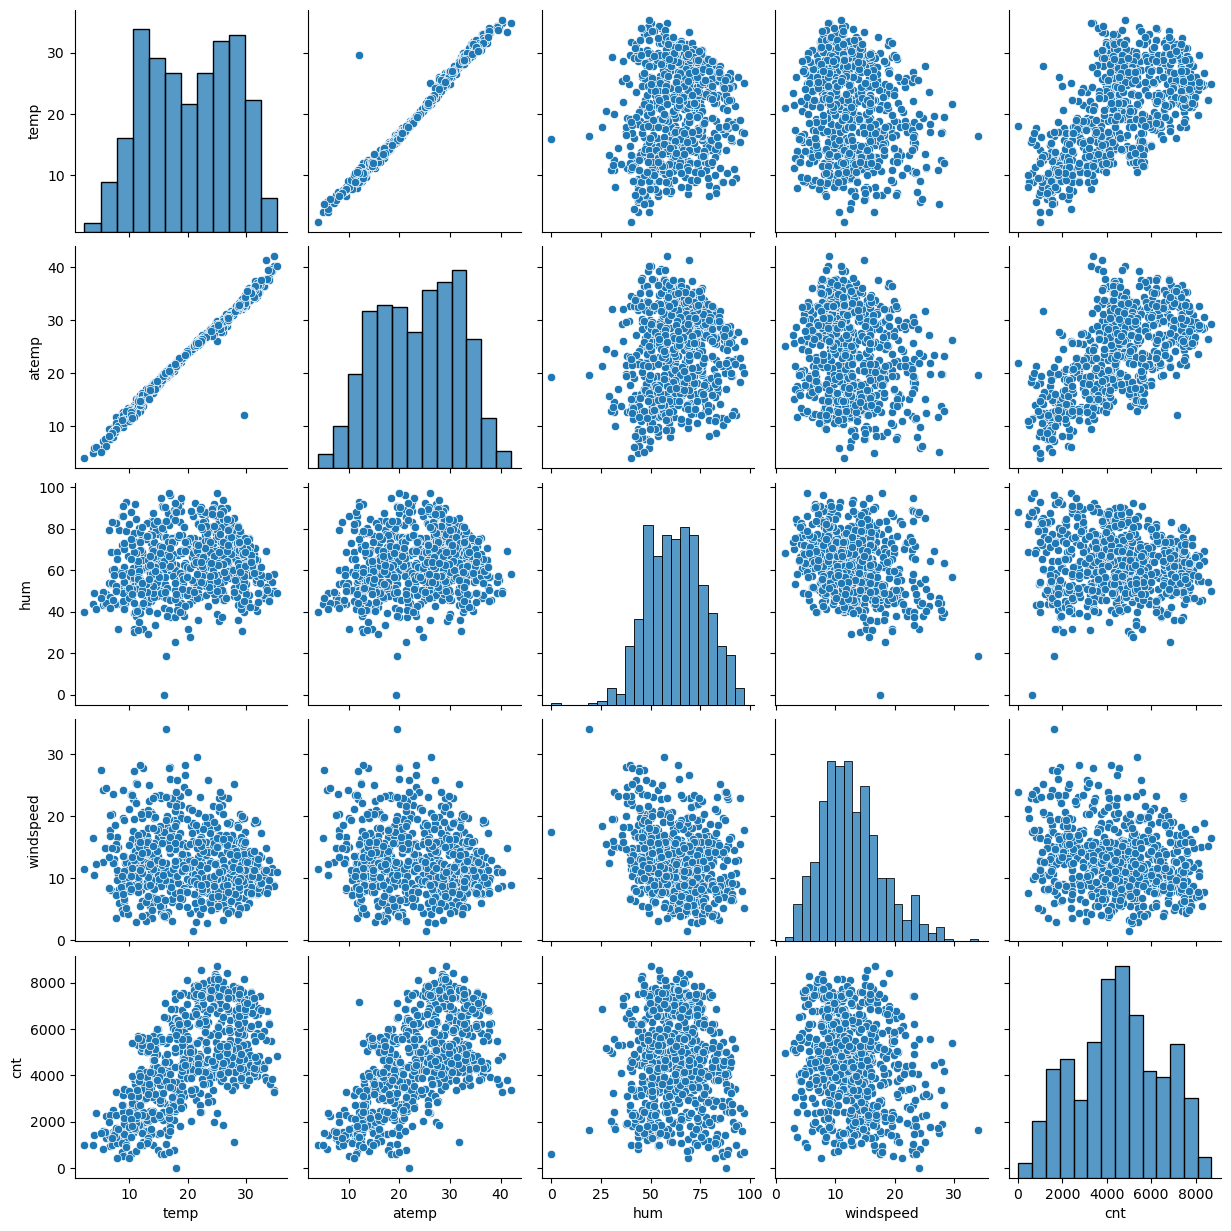

In [15]:
# Visualizing numeric variables
# Let's make a pairplot of all the numeric variables

sns.pairplot(bike[['temp','atemp','hum','windspeed','cnt']])
plt.show()

## From the above graphs we can understand that variables `temp` and `atemp` shows some Linear Relation with `cnt` and among themselves.

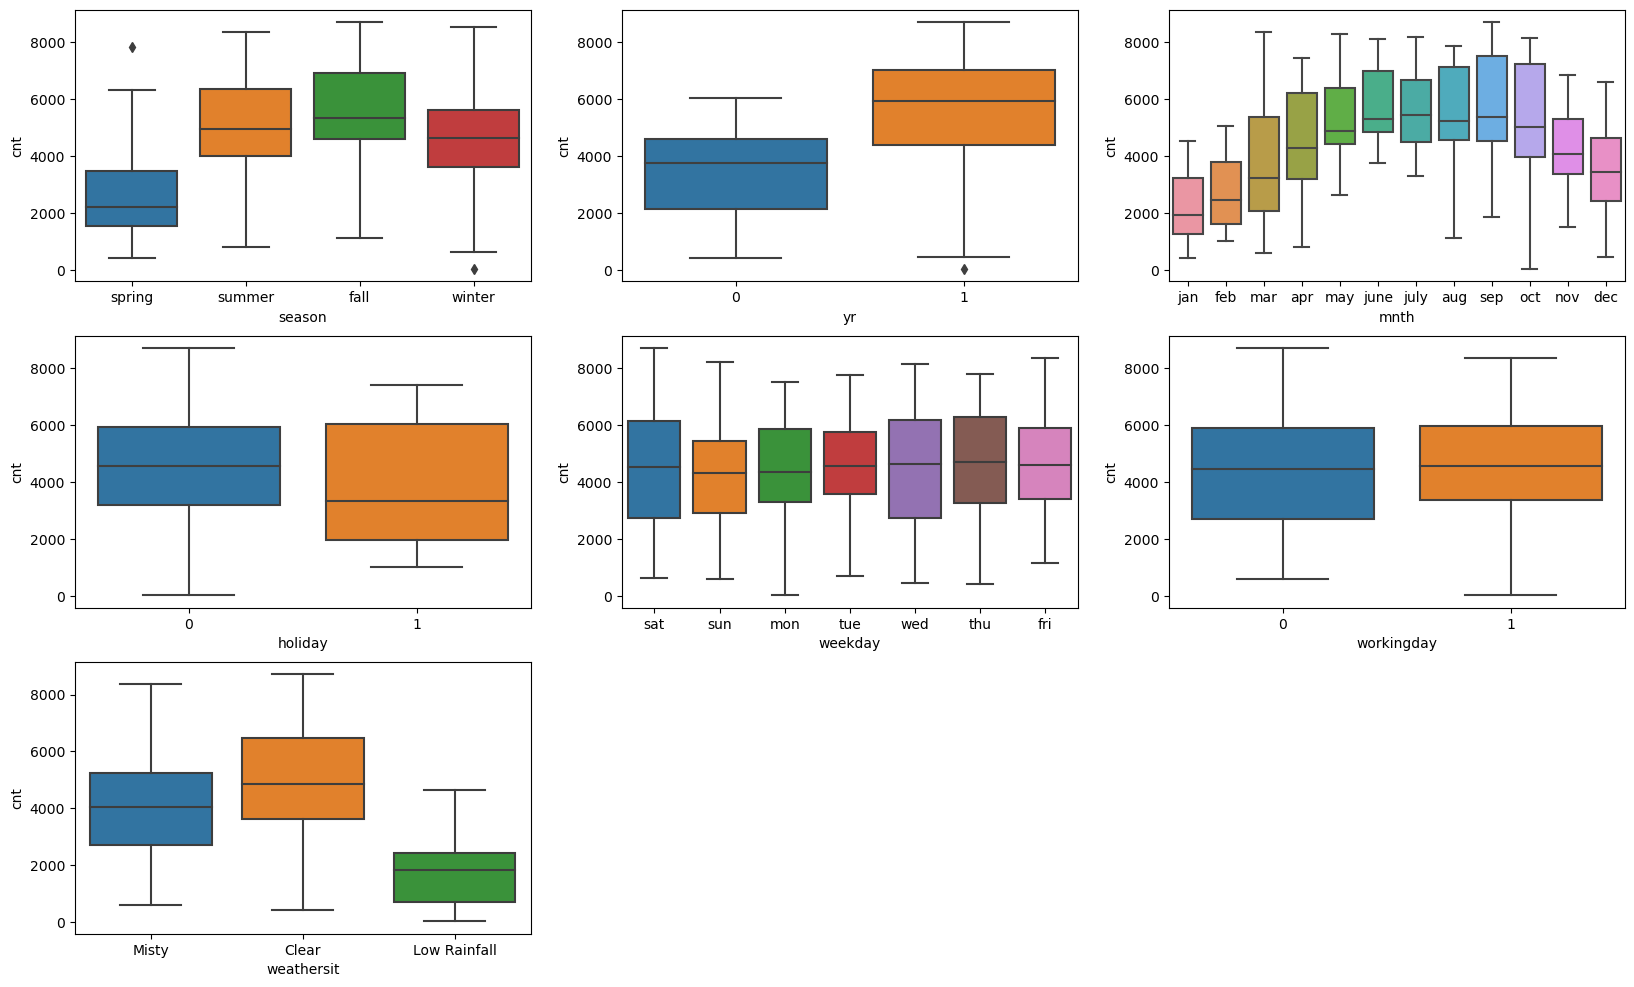

In [16]:
# Visualizing categorical variables
# Let's make a boxplot of all the categorical variables

plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.show()

### We can obeserve below from above graphs
- Season: Bikes demand is at its highest during the fall but undergoes the most significant decline during spring, reaching its lowest point.
- Year: In 2019, there was an increase in bikes demand compared to 2018.
- Months: Bikes are in high demand during the months spanning from May to October.
- Weather Situation: Clear or slightly cloudy weather conditions result in higher bicycle demand, whereas light rain or snow leads to lower demand.
- Holidays: During non-holidays, the demand is higher when compare of holidays.
- Weekdays: Bicycle demand remains consistent throughout the weekdays.
- Working Day: Whether it's a working day or not, bicycle demand remains unchanged.


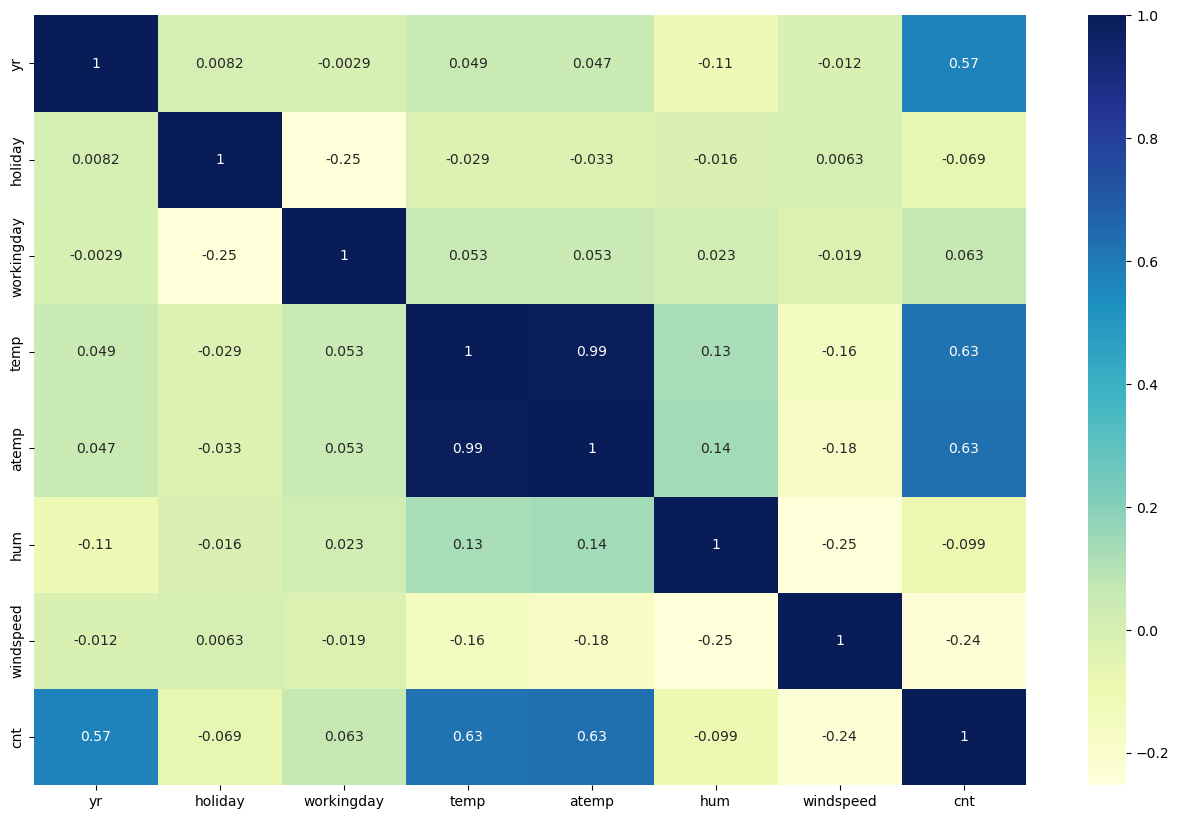

In [17]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(bike.corr(), annot = True, cmap="YlGnBu")
plt.show()

- We can obeserve below from above graphs

    - With Target variable `cnt`
        - `temp` & `atemp` has high correlation 
        - `windspeed` & `yr` also has a decent value of correlation.
    
        - `holiday` and `workingday` has decent value of correlation among themselves, so intial guess - only one of these will remain in final model variable list.
        - Similarly, `windspeed` and `hum` has decent value of correlation among themselves, so intial guess - only one of these will remain in final model variable list.

In [18]:
# As the correlation between 'temp' and 'atemp' is 0.99 which is almost 1
# Let us drop temp and consider atemp

bike.drop(['temp'], axis = 1, inplace = True)
bike.head(10)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,01-01-2018,spring,0,jan,0,sat,0,Misty,18.18125,80.5833,10.749882,985
1,02-01-2018,spring,0,jan,0,sun,0,Misty,17.68695,69.6087,16.652113,801
2,03-01-2018,spring,0,jan,0,mon,1,Clear,9.47025,43.7273,16.636703,1349
3,04-01-2018,spring,0,jan,0,tue,1,Clear,10.60610,59.0435,10.739832,1562
4,05-01-2018,spring,0,jan,0,wed,1,Clear,11.46350,43.6957,12.522300,1600
5,06-01-2018,spring,0,jan,0,thu,1,Clear,11.66045,51.8261,6.000868,1606
6,07-01-2018,spring,0,jan,0,fri,1,Misty,10.44195,49.8696,11.304642,1510
7,08-01-2018,spring,0,jan,0,sat,0,Misty,8.11270,53.5833,17.875868,959
8,09-01-2018,spring,0,jan,0,sun,0,Clear,5.80875,43.4167,24.250650,822
9,10-01-2018,spring,0,jan,0,mon,1,Clear,7.54440,48.2917,14.958889,1321


## Step 3: Preaparing the Data for Modelling

### Creating the Dummy Variables

In [19]:
# Get the dummy variables for the feature 'season', 'weathersit', 'mnth' and 'weekday' 

d1 = pd.get_dummies(bike['season'], drop_first=True) ## for season feature
bike = pd.concat([bike, d1], axis = 1)  # Add the results to the original bike dataframe

d2 = pd.get_dummies(bike['weathersit'],drop_first=True) ## for weathersit feature
bike = pd.concat([bike, d2], axis = 1)  # Add the results to the original bike dataframe

d3 = pd.get_dummies(bike['mnth'], drop_first=True) ## for season feature
bike = pd.concat([bike, d3], axis = 1)  # Add the results to the original bike dataframe

d4 = pd.get_dummies(bike['weekday'],drop_first=True) ## for weathersit feature
bike = pd.concat([bike, d4], axis = 1)  # Add the results to the original bike dataframe

In [20]:
d2.head()

,Low Rainfall,Misty
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


- The data set has only 3 values for `weathersit` variable, so creating dummies has only created 2 sets of columns.

In [21]:
# Now let's see the head of our dataframe.

bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
0,01-01-2018,spring,0,jan,0,sat,0,Misty,18.18125,80.5833,...,0,0,0,0,0,1,0,0,0,0
1,02-01-2018,spring,0,jan,0,sun,0,Misty,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,0
2,03-01-2018,spring,0,jan,0,mon,1,Clear,9.47025,43.7273,...,0,0,0,0,1,0,0,0,0,0
3,04-01-2018,spring,0,jan,0,tue,1,Clear,10.60610,59.0435,...,0,0,0,0,0,0,0,0,1,0
4,05-01-2018,spring,0,jan,0,wed,1,Clear,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,1


In [22]:
# Drop the columns for which we have created the dummies for and 'dteday' column as we already have the data in month, year columns.
#'season', 'dteday','mnth', 'weekday', 'weathersit'

bike.drop(['season','dteday','weathersit','mnth','weekday'], axis = 1, inplace = True)
bike.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,1


### Now the data is ready to split.

## Step 4: Splitting the Data into Train and Test Sets and Scaling the Data.

### Splitting the data into train_test

In [23]:
# Importing the SciKit Learn and train_test library
import sklearn
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
bike_train, bike_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100) # Splitting the data into 70-30

In [24]:
# Checking the size of train and test sets

print(bike_train.shape)
print(bike_test.shape)

(510, 29)
(219, 29)


### Scaling the variables

- We will use MinMax Scaler here

In [25]:
# Importing the MinMaxScaler Class

from sklearn.preprocessing import MinMaxScaler

In [26]:
# 1. Instantiate an object

scaler = MinMaxScaler()

In [27]:
# Create a list of Numeric Variables

num_vars = ['atemp', 'hum', 'windspeed','cnt']

In [28]:
# 2. Fit on Data

bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

bike_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,1,...,0,0,1,0,0,0,0,0,1,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [29]:
bike_train[num_vars].describe()

,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000
mean,0.512989,0.650369,0.320768,0.513620
std,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000
25%,0.332086,0.538643,0.199179,0.356420
50%,0.526811,0.653714,0.296763,0.518638
75%,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000


## Step 5: Training the Model

### 1. Checking the Correlation

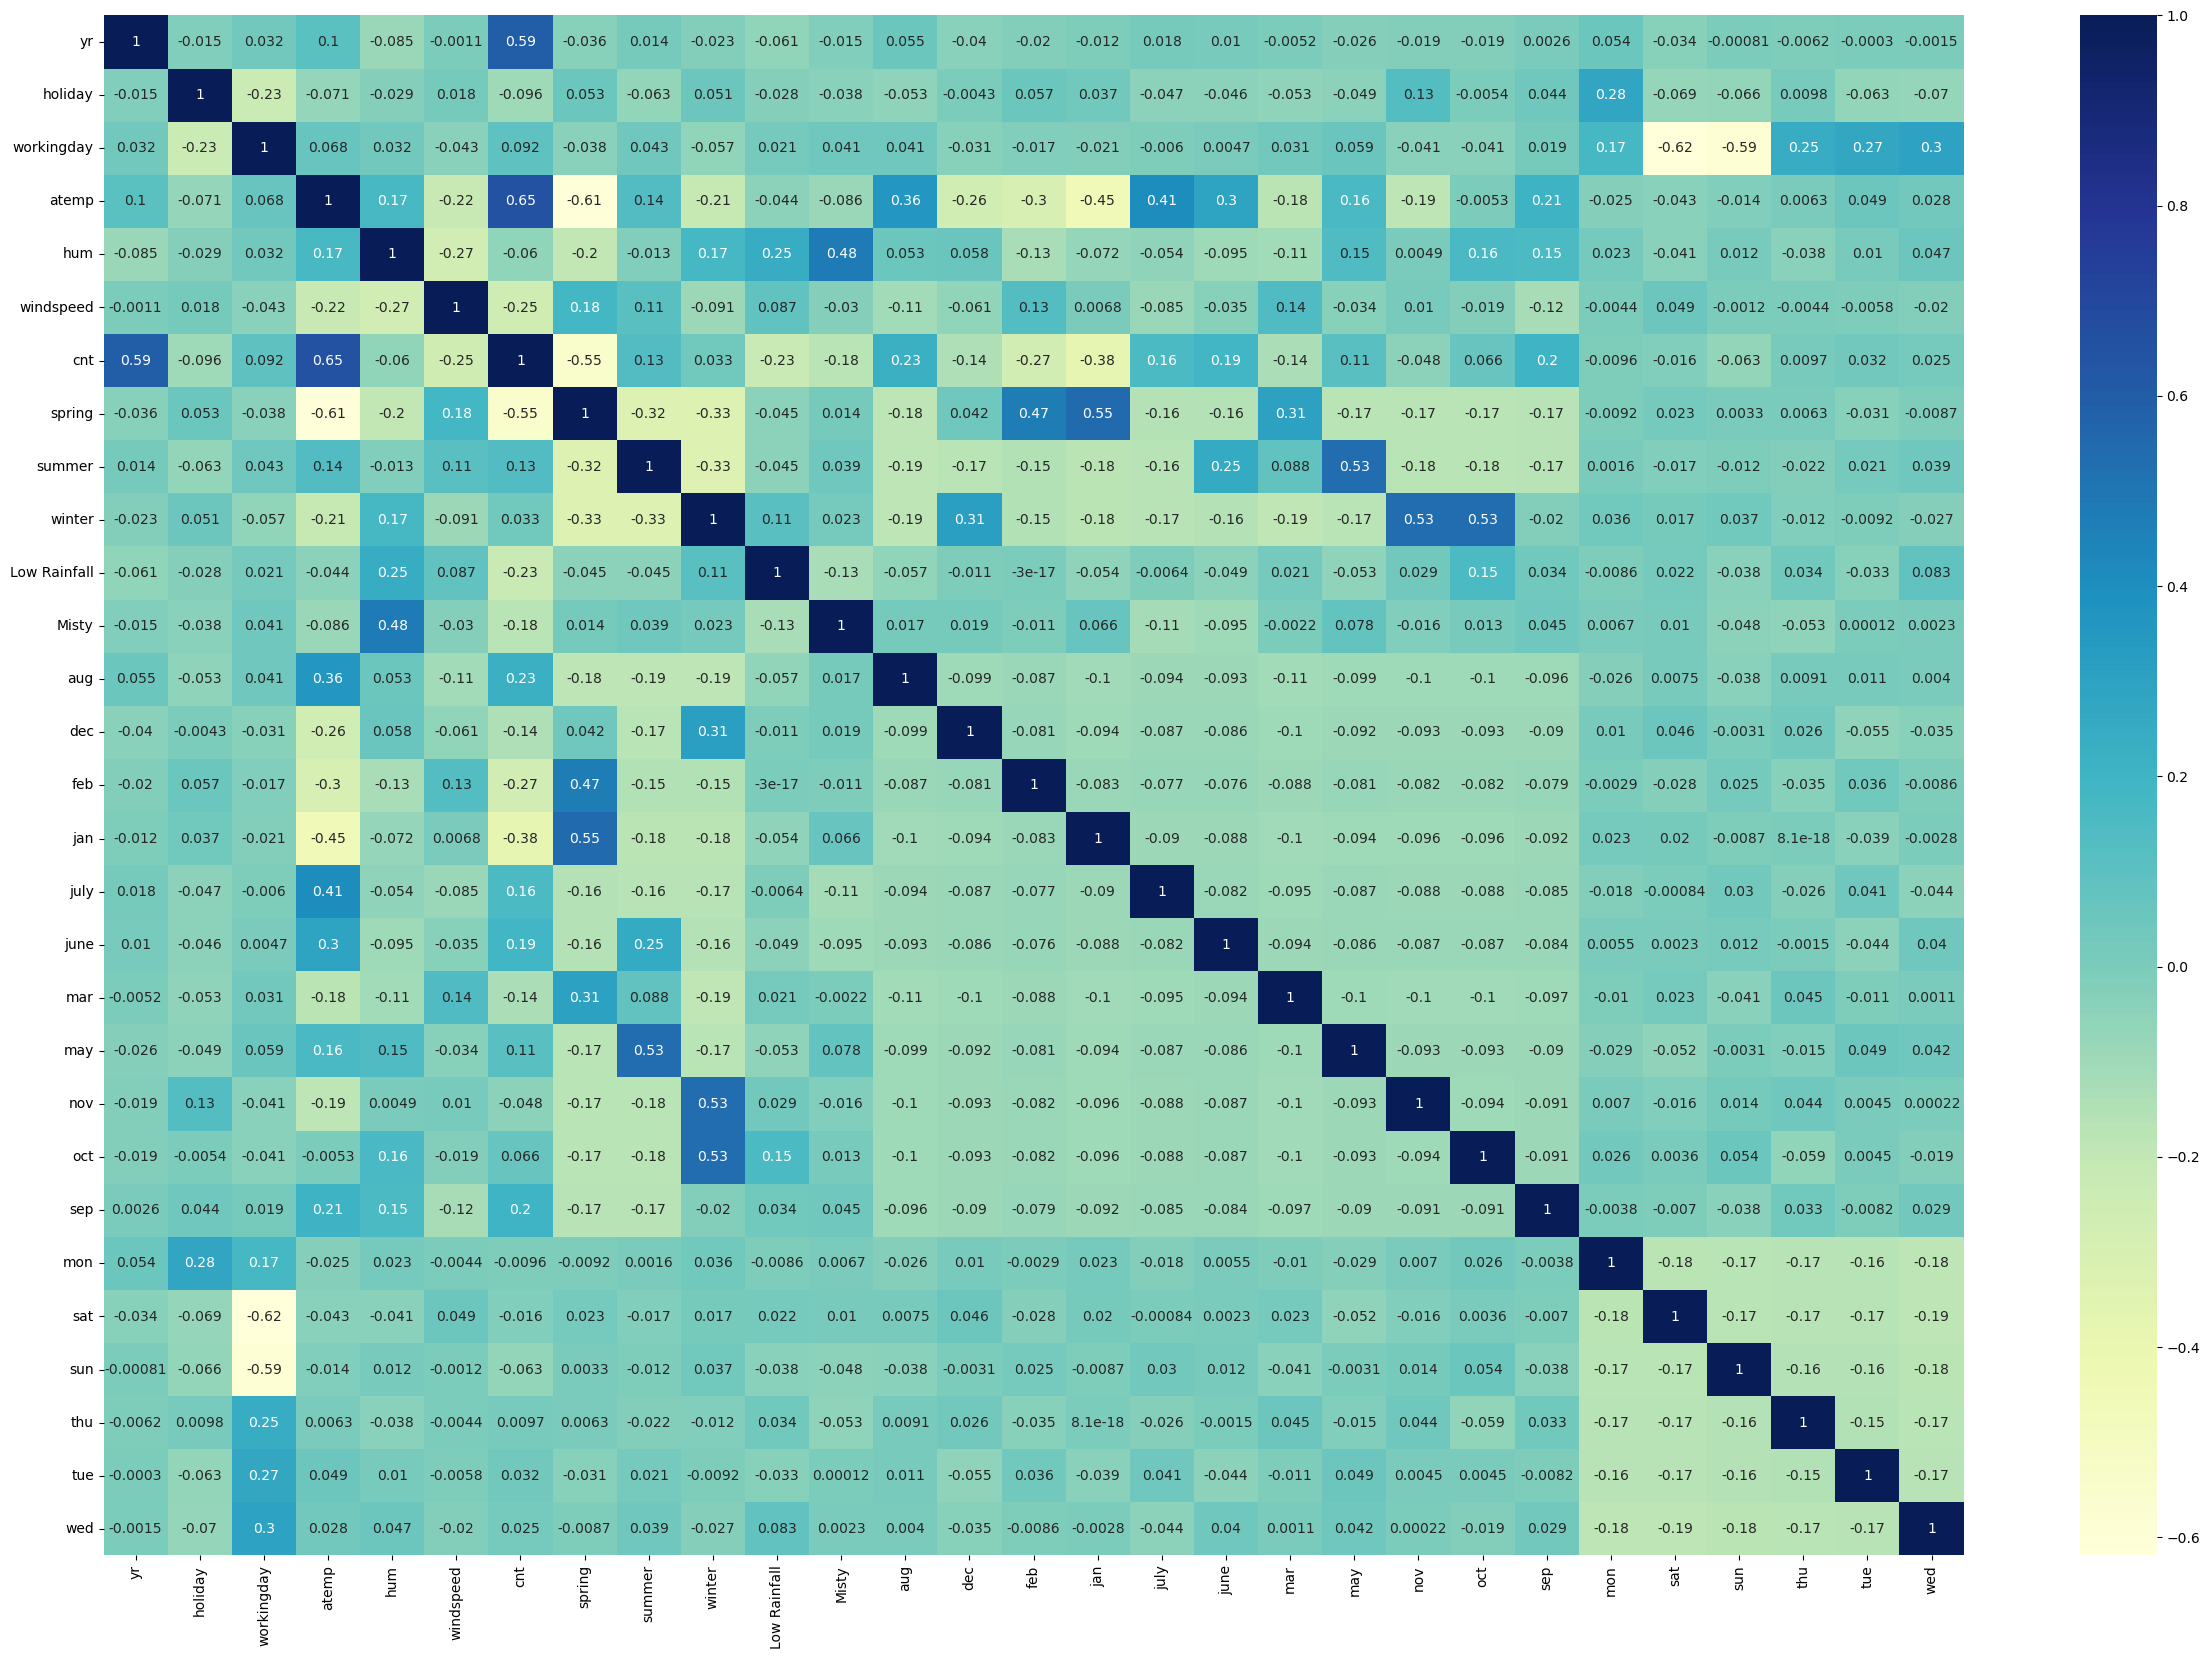

In [30]:
# heatmap

plt.figure(figsize = (30,20))
sns.heatmap(bike_train.corr(), annot = True, cmap = 'YlGnBu')
plt.show()

### 2. Dividing into X and Y sets for the model building

In [31]:
y_train = bike_train.pop('cnt')
X_train = bike_train

In [32]:
X_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,Low Rainfall,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
653,1,0,1,0.501133,0.575354,0.300794,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
576,1,0,1,0.766351,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.438975,0.640189,0.255342,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.200348,0.498067,0.663106,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


## Step 6: Building linear models

- We will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### `RFE` - Feature selection 

In [33]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [34]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [35]:
# Validating the ranking of variables
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 10),
 ('winter', False, 5),
 ('Low Rainfall', True, 1),
 ('Misty', False, 3),
 ('aug', False, 11),
 ('dec', False, 8),
 ('feb', False, 9),
 ('jan', False, 6),
 ('july', False, 2),
 ('june', False, 17),
 ('mar', False, 18),
 ('may', False, 19),
 ('nov', False, 7),
 ('oct', False, 16),
 ('sep', False, 4),
 ('mon', False, 12),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 14),
 ('tue', False, 13),
 ('wed', False, 15)]

In [36]:
# List of selected features
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'spring',
       'Low Rainfall', 'sat', 'sun'],
      dtype='object')

In [37]:
# Dropping the variables where we have received False values
X_train.columns[~rfe.support_]

Index(['summer', 'winter', 'Misty', 'aug', 'dec', 'feb', 'jan', 'july', 'june',
       'mar', 'may', 'nov', 'oct', 'sep', 'mon', 'thu', 'tue', 'wed'],
      dtype='object')

### Building model using statsmodel and VIF checking

#### Linear model 1

In [38]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [39]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [40]:
X_train_rfe.head()

,const,yr,holiday,workingday,atemp,hum,windspeed,spring,Low Rainfall,sat,sun
653,1.0,1,0,1,0.501133,0.575354,0.300794,0,0,0,0
576,1.0,1,0,1,0.766351,0.725633,0.264686,0,0,0,0
426,1.0,1,0,0,0.438975,0.640189,0.255342,1,0,1,0
728,1.0,1,0,0,0.200348,0.498067,0.663106,1,0,0,1
482,1.0,1,0,0,0.391735,0.504508,0.188475,0,0,1,0


In [41]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

#summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     238.2
Date:                Sat, 07 Oct 2023   Prob (F-statistic):          1.64e-174
Time:                        17:59:21   Log-Likelihood:                 463.16
No. Observations:                 510   AIC:                            -906.3
Df Residuals:                     500   BIC:                            -864.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3262      0.025     13.251      0.000       0.278       0.375
yr               0.2324      0.009     26.303      0.000       0.215       0.250
holiday          0.0321      0.023      1.405      0.161      -0.013       0.077
workingday       0.1081      0.010     10.928      0.000       0.089       0.127
atemp            0.4182      0.027     15.762      0.000       0.366       0.470
hum             -0.2218      0.033     -6.737      0.000      -0.287      -0.157
windspeed       -0.1853      0.027     -6.742      0.000      -0.239      -0.131
spring          -0.1549      0.013    -11.921      0.000      -0.180      -0.129
Low Rainfall    -0.1959      0.027     -7.210      0.000      -0.249      -0.142
sat              0.1174      0.012      9.598      0.000       0.093       0.141
sun              0.0687      0.013      5.423      0.000       0.044       0.094
==============================================================================
Omnibus:                       52.413   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.437
Skew:                          -0.610   Prob(JB):                     5.70e-23
Kurtosis:                       4.826   Cond. No.                     9.87e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.4e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [42]:
# Building Model using Statsmodel

import statsmodels.api as sm

# adding constant
X_train_rfe_sm = sm.add_constant(X_train_rfe)

In [43]:
lm = sm.OLS(y_train,X_train_rfe_sm).fit()

In [44]:
lm.params

const           0.326247
yr              0.232420
holiday         0.032076
workingday      0.108068
atemp           0.418172
hum            -0.221826
windspeed      -0.185300
spring         -0.154858
Low Rainfall   -0.195879
sat             0.117381
sun             0.068722
dtype: float64

In [45]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     238.2
Date:                Sat, 07 Oct 2023   Prob (F-statistic):          1.64e-174
Time:                        17:59:21   Log-Likelihood:                 463.16
No. Observations:                 510   AIC:                            -906.3
Df Residuals:                     500   BIC:                            -864.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3262      0.025     13.251      0.000       0.278       0.375
yr               0.2324      0.009     26.303      0.000       0.215       0.250
holiday          0.0321      0.023      1.405      0.161      -0.013       0.077
workingday       0.1081      0.010     10.928      0.000       0.089       0.127
atemp            0.4182      0.027     15.762      0.000       0.366       0.470
hum             -0.2218      0.033     -6.737      0.000      -0.287      -0.157
windspeed       -0.1853      0.027     -6.742      0.000      -0.239      -0.131
spring          -0.1549      0.013    -11.921      0.000      -0.180      -0.129
Low Rainfall    -0.1959      0.027     -7.210      0.000      -0.249      -0.142
sat              0.1174      0.012      9.598      0.000       0.093       0.141
sun              0.0687      0.013      5.423      0.000       0.044       0.094
==============================================================================
Omnibus:                       52.413   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.437
Skew:                          -0.610   Prob(JB):                     5.70e-23
Kurtosis:                       4.826   Cond. No.                     9.87e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.4e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### VIF Checking

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,holiday,inf
3,workingday,inf
9,sat,inf
10,sun,inf
4,atemp,1.66
7,spring,1.63
5,hum,1.21
6,windspeed,1.14
8,Low Rainfall,1.11
1,yr,1.02


In [47]:
#column 'holiday' has very high p-value and VIF so we drop it 
X_train_rfe=X_train_rfe.drop(['holiday'],axis=1)

In [48]:
X_train_rfe.head()

,const,yr,workingday,atemp,hum,windspeed,spring,Low Rainfall,sat,sun
653,1.0,1,1,0.501133,0.575354,0.300794,0,0,0,0
576,1.0,1,1,0.766351,0.725633,0.264686,0,0,0,0
426,1.0,1,0,0.438975,0.640189,0.255342,1,0,1,0
728,1.0,1,0,0.200348,0.498067,0.663106,1,0,0,1
482,1.0,1,0,0.391735,0.504508,0.188475,0,0,1,0


#### Linear Model 2

In [49]:
import statsmodels.api as sm  
X_train_rfe_sm = sm.add_constant(X_train_rfe)

In [50]:
lm = sm.OLS(y_train,X_train_rfe_sm).fit()

In [51]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     238.2
Date:                Sat, 07 Oct 2023   Prob (F-statistic):          1.64e-174
Time:                        17:59:21   Log-Likelihood:                 463.16
No. Observations:                 510   AIC:                            -906.3
Df Residuals:                     500   BIC:                            -864.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3583      0.040      8.955      0.000       0.280       0.437
yr               0.2324      0.009     26.303      0.000       0.215       0.250
workingday       0.0760      0.028      2.719      0.007       0.021       0.131
atemp            0.4182      0.027     15.762      0.000       0.366       0.470
hum             -0.2218      0.033     -6.737      0.000      -0.287      -0.157
windspeed       -0.1853      0.027     -6.742      0.000      -0.239      -0.131
spring          -0.1549      0.013    -11.921      0.000      -0.180      -0.129
Low Rainfall    -0.1959      0.027     -7.210      0.000      -0.249      -0.142
sat              0.0853      0.030      2.886      0.004       0.027       0.143
sun              0.0366      0.030      1.233      0.218      -0.022       0.095
==============================================================================
Omnibus:                       52.413   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.437
Skew:                          -0.610   Prob(JB):                     5.70e-23
Kurtosis:                       4.826   Cond. No.                         22.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,84.07
2,workingday,8.97
8,sat,6.00
9,sun,5.69
3,atemp,1.66
6,spring,1.63
4,hum,1.21
5,windspeed,1.14
7,Low Rainfall,1.11
1,yr,1.02


In [53]:
#column 'sun' has high p-value so we drop it 
X_train_rfe=X_train_rfe.drop(['sun'],axis=1)

In [54]:
X_train_rfe.head()

,const,yr,workingday,atemp,hum,windspeed,spring,Low Rainfall,sat
653,1.0,1,1,0.501133,0.575354,0.300794,0,0,0
576,1.0,1,1,0.766351,0.725633,0.264686,0,0,0
426,1.0,1,0,0.438975,0.640189,0.255342,1,0,1
728,1.0,1,0,0.200348,0.498067,0.663106,1,0,0
482,1.0,1,0,0.391735,0.504508,0.188475,0,0,1


#### Linear Model 3

In [55]:
import statsmodels.api as sm  
X_train_rfe_sm = sm.add_constant(X_train_rfe)

In [56]:
lm = sm.OLS(y_train,X_train_rfe_sm).fit()

In [57]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     267.5
Date:                Sat, 07 Oct 2023   Prob (F-statistic):          2.07e-175
Time:                        17:59:22   Log-Likelihood:                 462.39
No. Observations:                 510   AIC:                            -906.8
Df Residuals:                     501   BIC:                            -868.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3884      0.032     12.235      0.000       0.326       0.451
yr               0.2325      0.009     26.303      0.000       0.215       0.250
workingday       0.0448      0.012      3.763      0.000       0.021       0.068
atemp            0.4194      0.027     15.809      0.000       0.367       0.471
hum             -0.2211      0.033     -6.713      0.000      -0.286      -0.156
windspeed       -0.1853      0.027     -6.738      0.000      -0.239      -0.131
spring          -0.1550      0.013    -11.930      0.000      -0.181      -0.130
Low Rainfall    -0.1956      0.027     -7.195      0.000      -0.249      -0.142
sat              0.0542      0.015      3.520      0.000       0.024       0.084
==============================================================================
Omnibus:                       54.755   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.669
Skew:                          -0.626   Prob(JB):                     1.53e-24
Kurtosis:                       4.896   Cond. No.                         17.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,52.86
3,atemp,1.66
2,workingday,1.63
6,spring,1.63
8,sat,1.63
4,hum,1.21
5,windspeed,1.14
7,Low Rainfall,1.11
1,yr,1.02


### Observations: 

- R-squared and Adj. R-squared are stil ~81% which is quite good and all the p-values of the remaining variables are now ~0.

- Also, we can see that the VIF of all the variables are less than 5.

- Now we can stop model building and as per the analysis, model 3 seems to give a good result so we choose it.

## Step 7: Residual Analysis of the Train Data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [59]:
# Predict Values

y_train_pred = lm.predict(X_train_rfe_sm)

In [60]:
# Calculating Residuals

res = y_train - y_train_pred

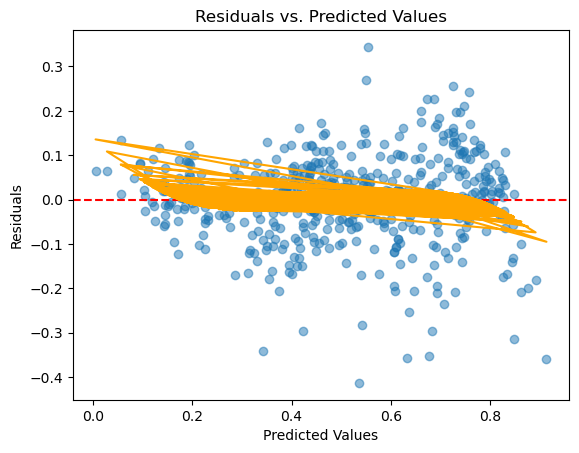

In [78]:
# Create a scatter plot of residuals vs. predicted values
plt.scatter(y_train_pred, res, alpha=0.5)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")

# Add a horizontal line at y=0 for reference
plt.axhline(y=0, color='r', linestyle='--')

# Optionally, you can add a smoothing line (LOESS) to check for patterns
smoothed = np.polyfit(y_train_pred, res, 3)  
smoothed_values = np.polyval(smoothed, y_train_pred)
plt.plot(y_train_pred, smoothed_values, color='orange')

plt.show()

Text(0.5, 0, 'Errors')

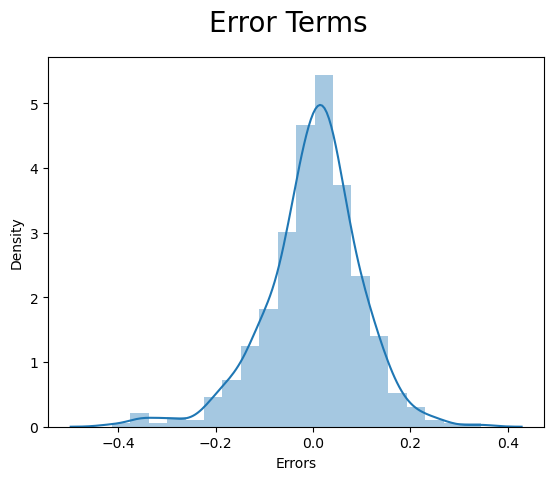

In [61]:
#Checking ASSUMPTION OF NORMALITY:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 10) 

In [63]:
#Checking columns
X_train_rfe_sm.columns

Index(['const', 'yr', 'workingday', 'atemp', 'hum', 'windspeed', 'spring',
       'Low Rainfall', 'sat'],
      dtype='object')

In [64]:
print(X_train_rfe_sm.shape)
print(res.shape)

(510, 9)
(510,)


In [65]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)
X_train_rfe.head()

,yr,workingday,atemp,hum,windspeed,spring,Low Rainfall,sat
653,1,1,0.501133,0.575354,0.300794,0,0,0
576,1,1,0.766351,0.725633,0.264686,0,0,0
426,1,0,0.438975,0.640189,0.255342,1,0,1
728,1,0,0.200348,0.498067,0.663106,1,0,0
482,1,0,0.391735,0.504508,0.188475,0,0,1


## Step 7: Making Predictions on Test set


### Applying the scaling on the test sets

In [66]:
#Scaling the test data

num_vars = ['atemp', 'hum', 'windspeed', 'cnt']
bike_test[num_vars] = scaler.transform(bike_test[num_vars])  ## using TRANSFORM only on Test set
bike_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
184,0,1,0,0.769660,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,0.842587,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,0,0,0,0,1
299,0,0,1,0.496145,0.837699,0.334206,0.303382,0,0,1,...,0,0,1,0,0,0,0,1,0,0
221,0,0,1,0.795343,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,0,0,1
152,0,0,1,0.741471,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [67]:
bike_test.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,...,0.086758,0.073059,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457
std,0.500722,0.188034,0.459904,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,...,0.282125,0.260830,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297
min,0.000000,0.000000,0.000000,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- After applying TRANSFORM on Test data, we can see that for `windspeed` variable, we have got `negative value` as minimum. 

### Dividing into X_test and y_test


In [68]:
# Creating X and y test sets

y_test = bike_test.pop('cnt')
X_test = bike_test

In [69]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_sm = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_sm = sm.add_constant(X_test_sm)

In [70]:
X_test_sm.head()

,const,yr,workingday,atemp,hum,windspeed,spring,Low Rainfall,sat
184,1.0,0,0,0.769660,0.657364,0.084219,0,0,0
535,1.0,1,1,0.842587,0.610133,0.153728,0,0,0
299,1.0,0,1,0.496145,0.837699,0.334206,0,0,0
221,1.0,0,1,0.795343,0.437098,0.339570,0,0,0
152,1.0,0,1,0.741471,0.314298,0.537414,0,0,0


### Making Predictions on Test set


In [71]:
# Making predictions
y_test_pred = lm.predict(X_test_sm)

## Step 8: Model Evaluation


In [81]:
from sklearn.metrics import r2_score
r2_score(y_train,y_train_pred)

0.8102928168562423

In [80]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.8032959977599391

#### Analysis
- R-squared value of Test set is ~80%, which is close to what we had for Training data. So our model has worked well on Test data set as well.

Text(0, 0.5, 'y_test_pred')

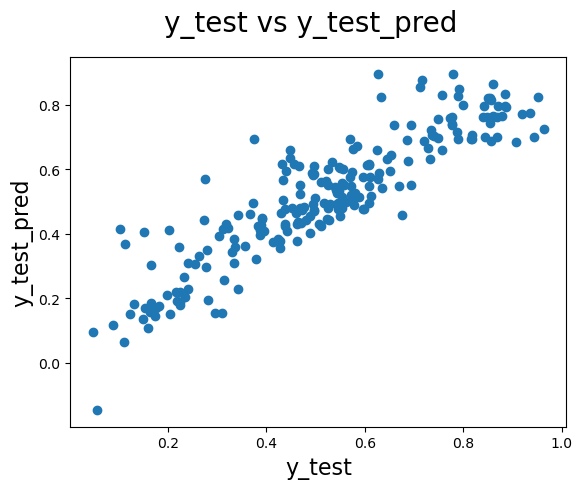

In [73]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 16)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

## Conclusion:
- We can see 1 Negative prediction here which can be due to Scaling of the Test variables based in `scaler` object of Training data set. We have made similar obsevation after applying scaling on test set , `windspeed` minimum value was negative.
- It is possible to cap the value of 'y_test_pred' to not show any negative values but we are not doing that here.
- The point here is - Even though we have got a Negative value, but the Relation shown between actual and predicted values here is Linear.